In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


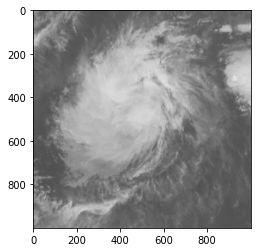

In [52]:
img=mpimg.imread('/ws_data/CWB/typhoon/Image_B13/train/070/2016-12-26_0600.B13.140N1199E.jpg')
plt.imshow(img)

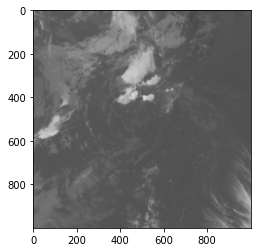

In [53]:
img=mpimg.imread('/ws_data/CWB/typhoon/Image_B13/train/010/2016-07-19_0600.B13.285N1282E.jpg')
plt.imshow(img)

```bash
for VARIABLE in `ls train`; 
do 
echo $VARIABLE; 
mv `ls train/$VARIABLE/* | tail -10` test/$VARIABLE/.
done
```

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import os
import numpy as np
from glob import glob

root_dir = '/ws_data/CWB/typhoon/Image_B13/'

train_ds = tf.data.Dataset.list_files(os.path.join(root_dir, 'train/*/*'), shuffle=True)
test_ds = tf.data.Dataset.list_files(os.path.join(root_dir, 'test/*/*'), shuffle=True)

class_names = np.array(sorted([os.path.basename(item) for item in glob(os.path.join(root_dir,'train/*'))]))
print(class_names)

def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    one_hot = parts[-2] == class_names
    return tf.argmax(one_hot)

def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)
    return tf.image.resize(img, [250, 250])

def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)

['010' '020' '025' '030' '035' '040' '045' '050' '060' '070' '080' '090'
 '110' '130']


In [3]:
iter = iter(train_ds)

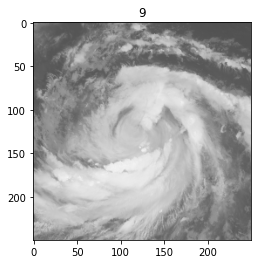

In [20]:
img, y = next(iter)
plt.title(f'{y}')
plt.imshow(img/256)

In [5]:
import os
import numpy as np
from glob import glob

root_dir = '/ws_data/CWB/typhoon/Image_B13/'

class_names = np.array(sorted([item.split('/')[-2] for item in glob(os.path.join(root_dir,'train/*/*'))]))

In [6]:
class_names

array(['010', '010', '010', ..., '130', '130', '130'], dtype='<U3')

In [7]:
import seaborn as sns

<AxesSubplot:>

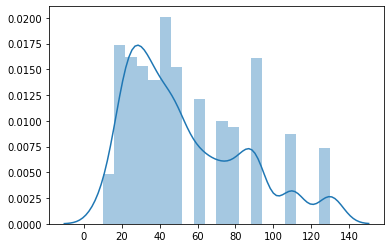

In [8]:
sns.distplot(class_names)